In [1]:
import sys
sys.path
sys.path.append("../")
sys.path.append("../../")

# Usage of xai-comparison package

This notebook demonstrates the setup and usage of the XAI Comparison package, using a `RandomForestClassifier` on the German credit dataset.

## Steps

1. Define the model
2. Load the dataset
3. Set the mode (classification/regression)
4. Configure parameters
5. Initialize the `ComparisonFactory`
6. Create and apply comparisons

In [2]:
# Step 1: Define the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

## Step 2: Load the dataset

We will use the German credit dataset provided by the XAI Comparison package.

In [3]:
from xai_compare.datasets import german_credit

# Load the dataset
X, y = german_credit()
print("Data loaded successfully!")

Data loaded successfully!


## Step 3: Set the mode

Specify the mode as either `MODE.CLASSIFICATION` or `MODE.REGRESSION`.

In [4]:
from xai_compare.config import MODE

# Set the mode
mode = MODE.CLASSIFICATION

## Step 4: Configure parameters

In this step, we define the parameters for the `ComparisonFactory`. These parameters include the model, dataset, target, and additional configurations for the explainers.

Specifying Default Explainers
By default, the XAI Comparison package supports several explainers, including SHAP, LIME, and Permutation Importance. You can specify which explainers to use by setting the `default_explainers` parameter. Here’s how you can do it:

In [22]:
# Example of specifying default explainers
params = {
    'model': model,
    'data': X,
    'target': y,
    'verbose': False,
    'mode': mode,
    'default_explainers': ['shap', 'lime', 'permutations'],  # Specify the explainers to use
    'custom_explainer': None  # We will not use a custom explainer in this example
}

This configuration will tell the `ComparisonFactory` to use SHAP, LIME, and Permutation Importance for the explainability comparisons.

## Step 5: Initialize the `ComparisonFactory`

The `ComparisonFactory` is responsible for creating comparison objects based on the given explainers and other parameters.
This class simplifies the process of implementing different types of comparison methods by providing a common interface for specifying the required train and test datasets along with the model.

In [23]:
from xai_compare.factory import ComparisonFactory

# Initialize the ComparisonFactory
comparison_factory = ComparisonFactory(**params)

## Step 6: Create and apply comparisons

Loop through the comparison techniques and apply them to the model and data.

Applying feature_selection...


Explainers: 100%|██████████| 3/3 [06:25<00:00, 128.42s/it]


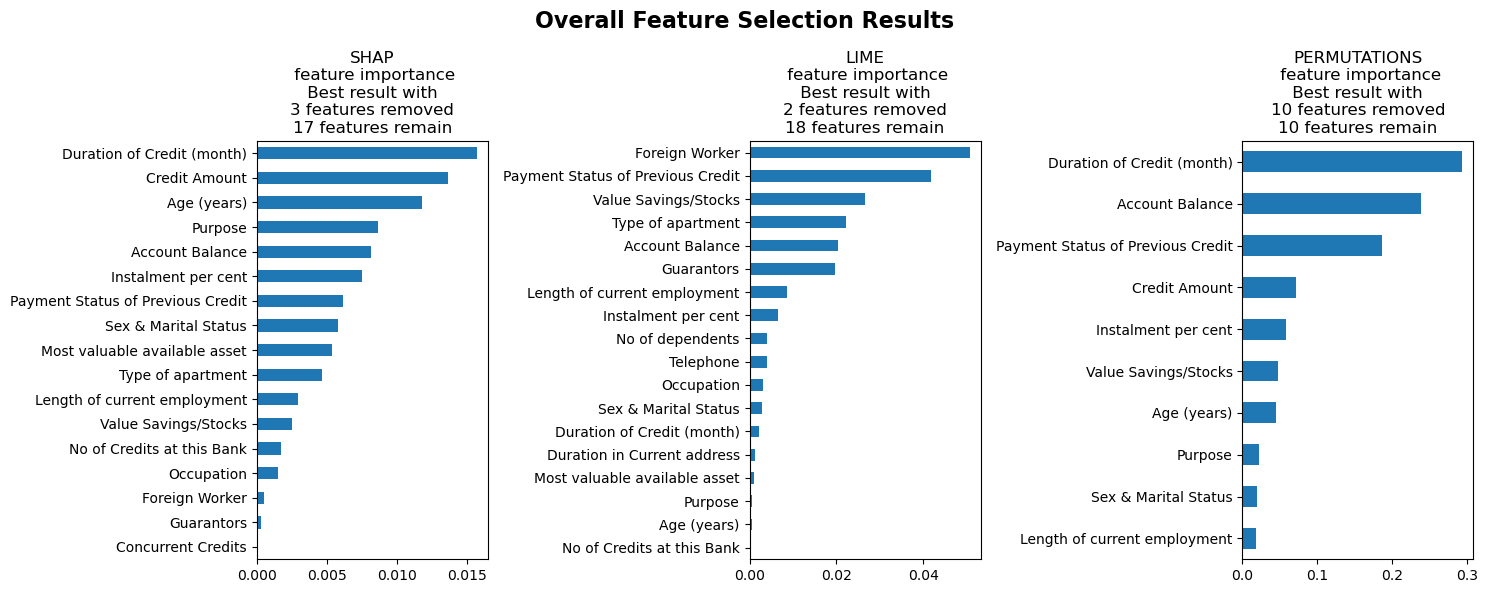

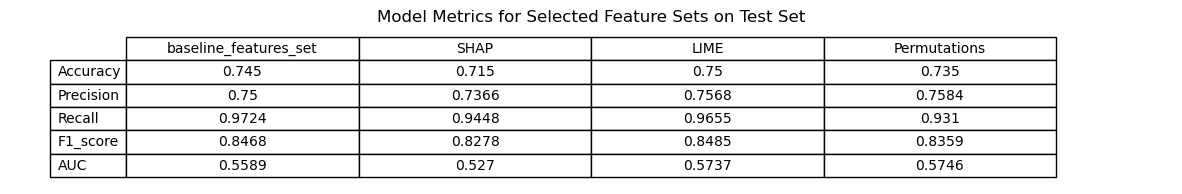

Applying consistency...


Processing folds: 100%|██████████| 5/5 [01:03<00:00, 12.61s/it]


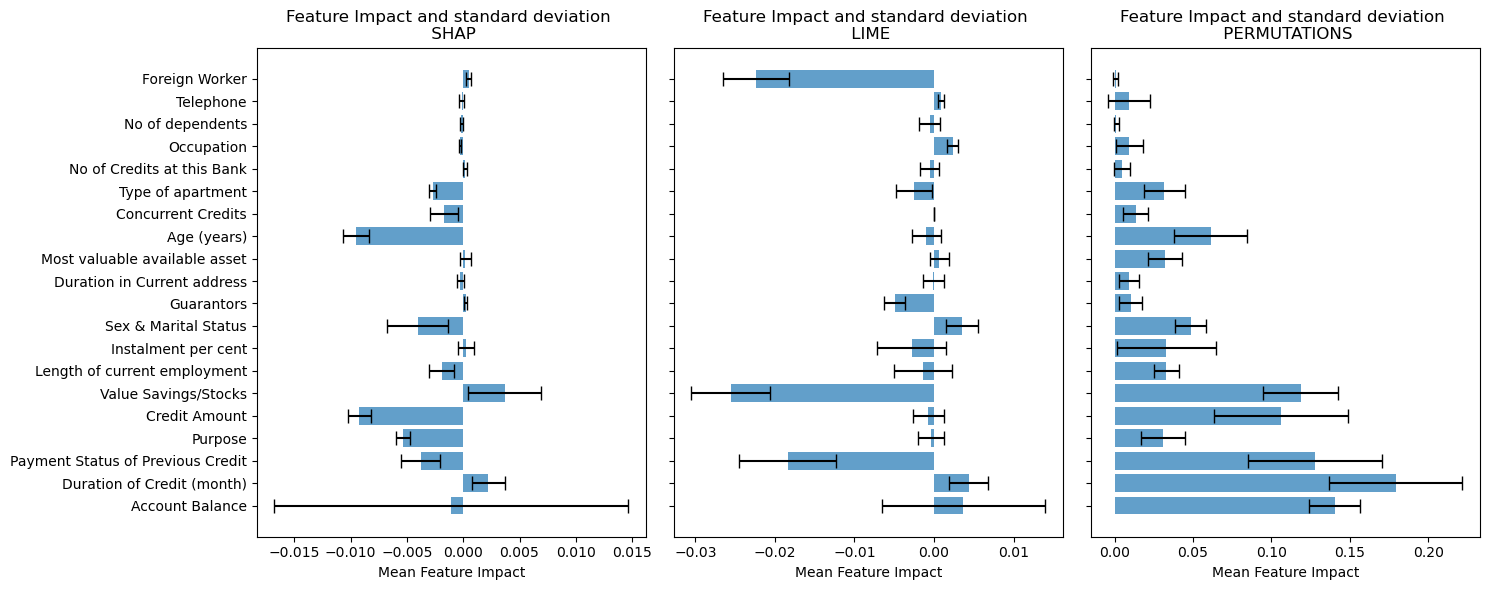

               min_std   max_std  mean_std  median_std
SHAP          0.000107  0.015712  0.001641    0.000667
LIME          0.000000  0.010295  0.002645    0.001874
Permutations  0.001431  0.042767  0.016518    0.011960


In [24]:
from xai_compare.config import COMPARISON_TECHNIQUES

for technique in COMPARISON_TECHNIQUES:
    print(f"Applying {technique}...")
    comparison = comparison_factory.create(technique)
    comparison.apply()
    comparison.display()

## Creating and Using a Custom Explainer
If you want to create and use a custom explainer, you need to define a class that inherits from the `Explainer` abstract base class. Below is an example of how to create a custom explainer.

First, let’s create a custom explainer class that inherits from Explainer:


In [52]:
import pandas as pd
import numpy as np

# Local application imports
from xai_compare.explainer import Explainer
from xai_compare.config import MODE


class CustomExplainer(Explainer):
    """
    A custom explainer that demonstrates how to implement a new explainer
    inheriting from the abstract Explainer base class.
    """

    def __init__(self, model, X_train, y_train, y_pred=None, mode=MODE.CLASSIFICATION):
        super().__init__(model, X_train, y_train, y_pred, mode)

    def explain_global(self, X_data: pd.DataFrame) -> pd.DataFrame:
        """
        Generates a global explanation for the model predictions.
        This custom explainer returns the mean of the local explanations.
        """
        local_exps = self.explain_local(X_data)
        global_exp = np.mean(local_exps, axis=0)
        return pd.DataFrame(global_exp, index=X_data.columns, columns=['Custom Explainer Value'])

    def explain_local(self, X_data: pd.DataFrame) -> pd.DataFrame:
        """
        Generates a local explanation for the model predictions for individual samples.
        For demonstration, this custom explainer returns a DataFrame with random values.
        """

        normalized_data = (X_data - X_data.min()) / (X_data.max() - X_data.min())
        explanation = pd.DataFrame(np.random.rand(*normalized_data.shape) * normalized_data.values,
                                   columns=X_data.columns)
        return explanation
        return explanation

### Using the Custom Explainer
Now, you can use this custom explainer in the ComparisonFactory by passing an instance of it to the custom_explainer parameter:

In [57]:
# Example of using a custom explainer
params = {
    'model': model,
    'data': X,
    'target': y,
    'custom_explainer': [CustomExplainer],  # Pass the custom explainer
    'verbose': False,
    'mode': mode,
    'default_explainers': ['shap']  # Optionally, specify other default explainers or leave empty
}


## Initialize the `ComparisonFactory`. Create and apply comparisons
Use the same code like in example with default explainers:  

Applying feature_selection...


Explainers: 100%|██████████| 2/2 [00:53<00:00, 26.58s/it]


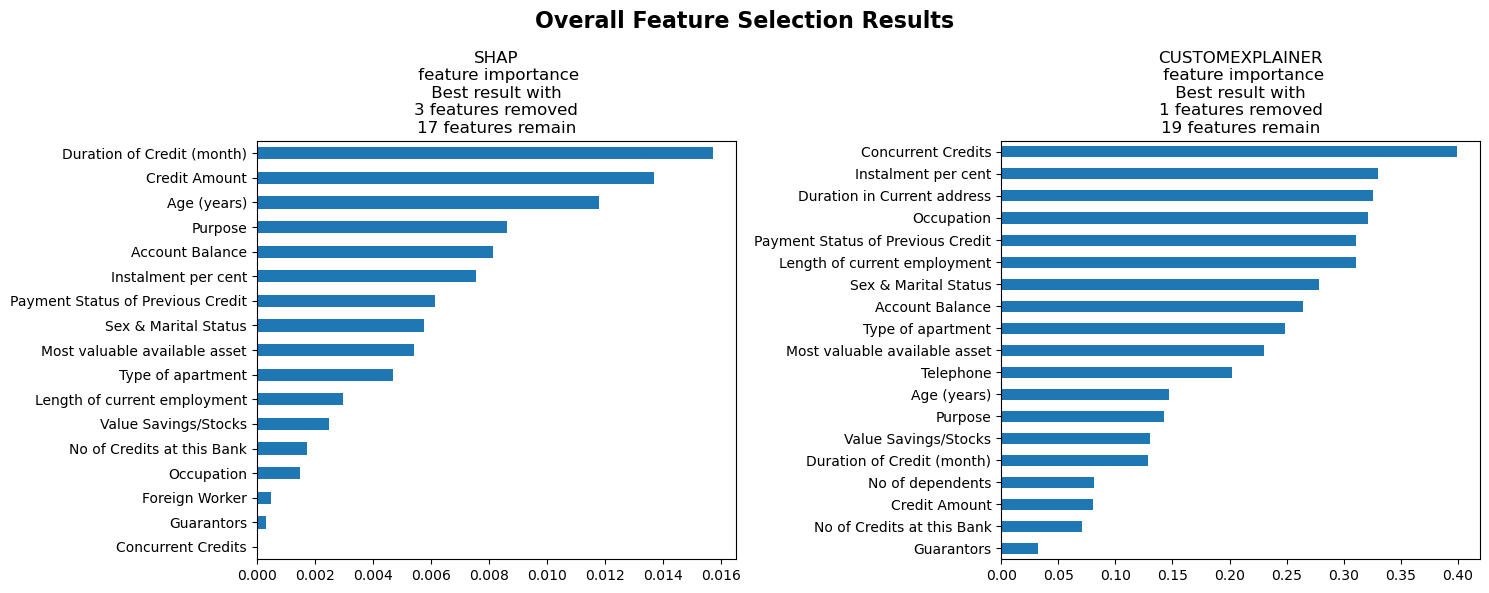

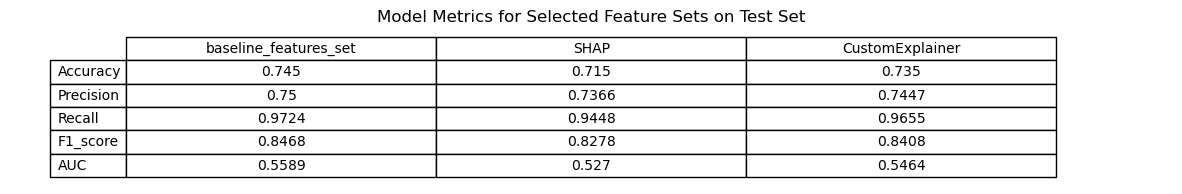

Applying consistency...


Processing folds: 100%|██████████| 5/5 [00:11<00:00,  2.26s/it]


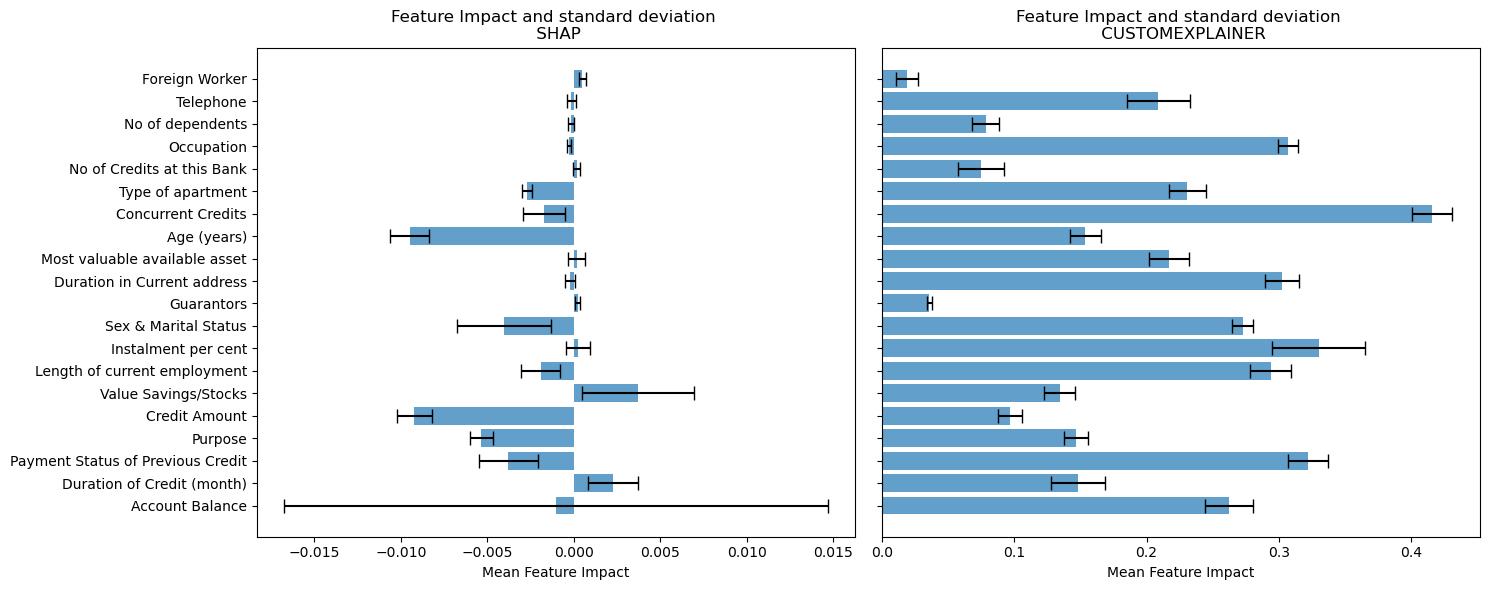

                  min_std   max_std  mean_std  median_std
SHAP             0.000107  0.015712  0.001641    0.000667
CustomExplainer  0.001836  0.034857  0.013945    0.013294


In [58]:
from xai_compare.factory import ComparisonFactory
from xai_compare.config import COMPARISON_TECHNIQUES

# Initialize the ComparisonFactory
comparison_factory = ComparisonFactory(**params)


for technique in COMPARISON_TECHNIQUES:
    print(f"Applying {technique}...")
    comparison = comparison_factory.create(technique)
    comparison.apply()
    comparison.display()


## Conclusion

This notebook has demonstrated how to use the XAI Comparison package to compare different explainability techniques on a RandomForestClassifier model using the German credit dataset. By following these steps, you can apply the package to your own models and datasets to gain insights into feature importance and model behavior.

Additionally, the notebook provided guidance on how to create and use a custom explainer. To do this, you define a class that inherits from the `Explainer` abstract base class and implement the `explain_global` and `explain_local` methods. Once the custom explainer class is defined, you can instantiate it and pass it to the ComparisonFactory as part of the parameters. This allows you to extend the functionality of the XAI Comparison package and adapt it to your specific needs, providing a flexible and powerful way to interpret model predictions.